In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
#dtypes = {'INTERVALSTARTTIME_GMT'}
parse_dates = pd.to_datetime
portWeather2024 = pd.read_csv('..\\Data\\PortlandWeather2024.csv',parse_dates=[5])
portWeather2023 = pd.read_csv('..\\Data\\PortlandWeather2023.csv',parse_dates=[5])
portWeather2023[["DATE", "TMAX"]]
merge = pd.merge_ordered(portWeather2023, portWeather2024)
merge


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-01,7.61,",,W",NaN,NaN,...,40.0,",,W",310.0,",,W",300.0,",,W",23.0,",,W",31.1,",,W"
1,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-02,2.91,",,W",NaN,NaN,...,29.0,",,W",120.0,",,W",260.0,",,W",8.9,",,W",12.1,",,W"
2,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-03,3.80,",,W",NaN,NaN,...,25.0,",,W",350.0,",,W",350.0,",,W",12.1,",,W",14.1,",,W"
3,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-04,4.70,",,W",NaN,NaN,...,36.0,",,W",50.0,",,W",50.0,",,W",16.1,",,W",21.0,",,W"
4,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-05,10.51,",,W",NaN,NaN,...,28.0,",,W",60.0,",,W",60.0,",,W",19.9,",,W",25.1,",,W"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-23,NaN,NaN,NaN,NaN,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-24,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-25,NaN,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-26,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


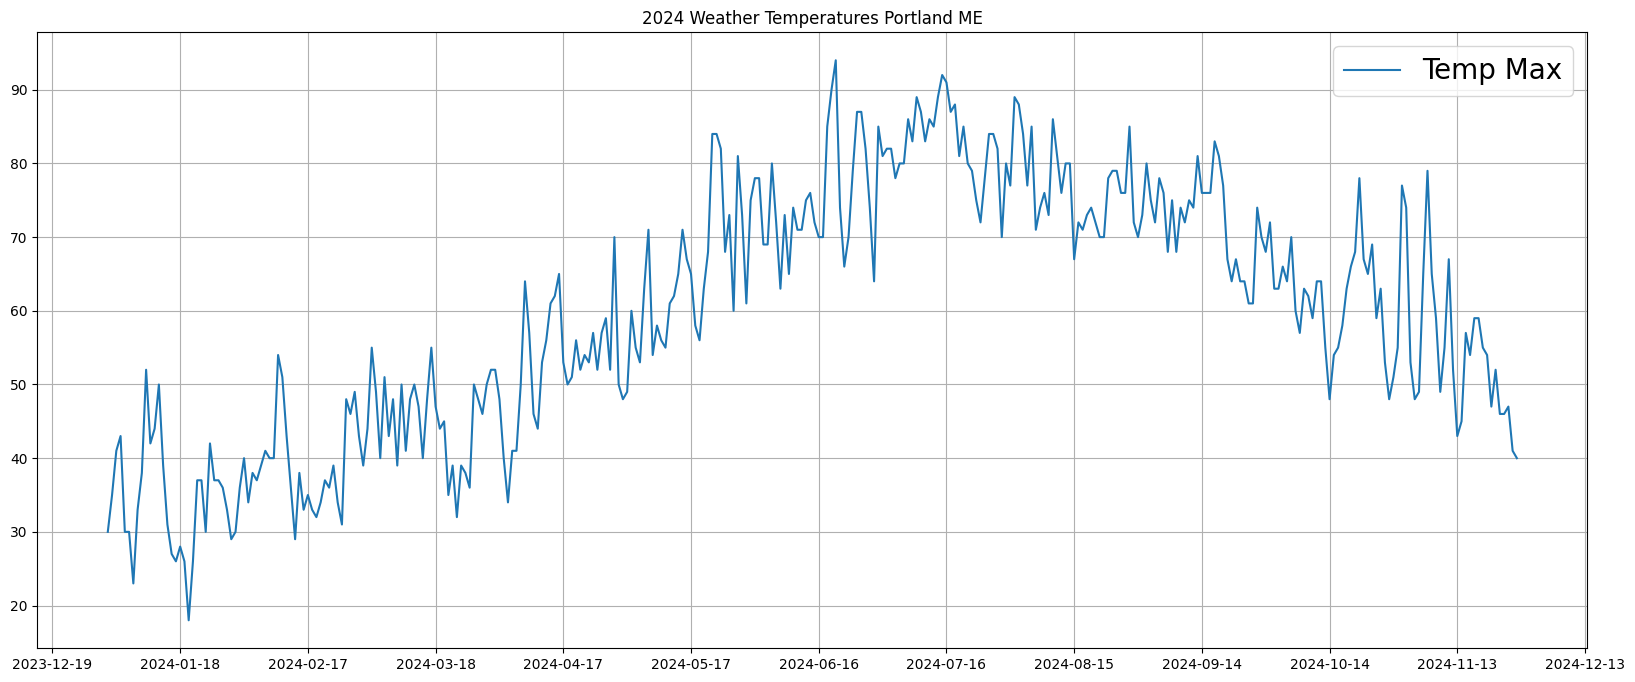

In [29]:
from matplotlib.ticker import (AutoMinorLocator, 
                               MultipleLocator)

fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(portWeather2024['DATE'], portWeather2024['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(30))
plt.title("2024 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()


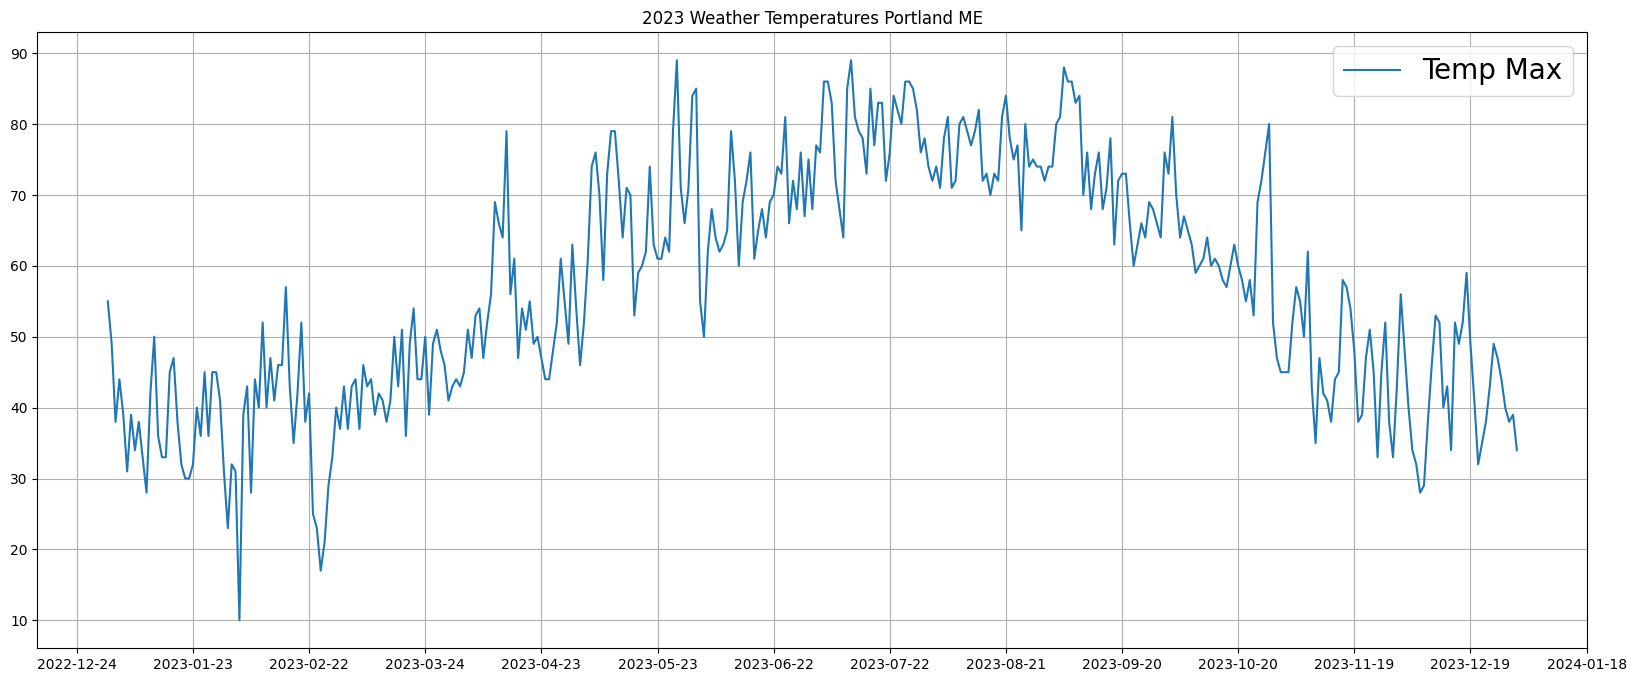

In [30]:
from matplotlib.ticker import (AutoMinorLocator, 
                               MultipleLocator)
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(portWeather2023['DATE'], portWeather2023['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(30))
plt.title("2023 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()

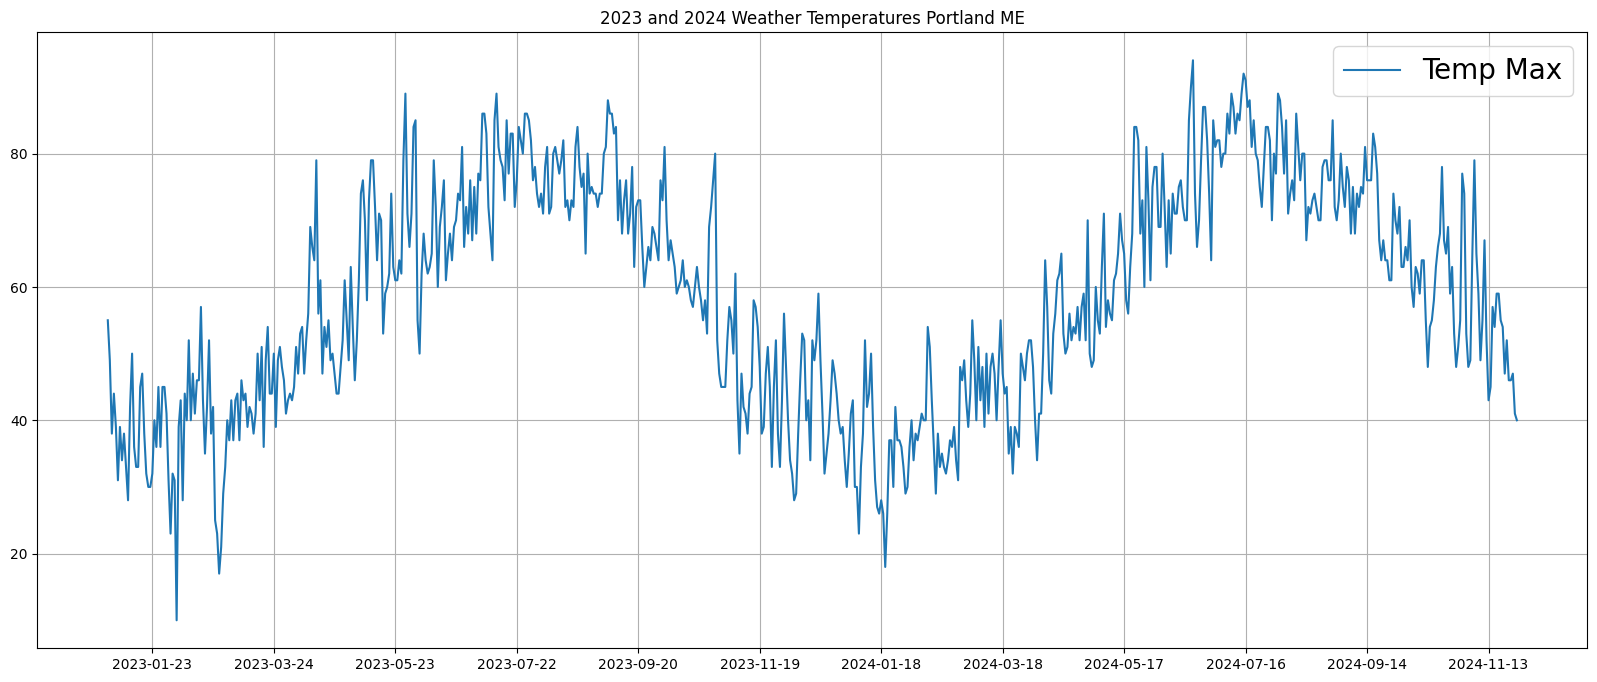

In [31]:
from matplotlib.ticker import (AutoMinorLocator, 
                               MultipleLocator)
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(merge['DATE'], merge['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(60))
plt.title("2023 and 2024 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()

In [32]:
len(merge)

697

g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

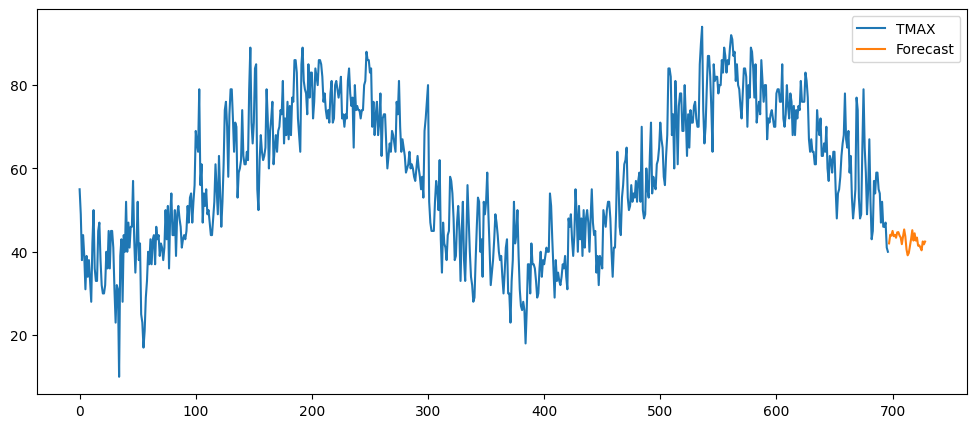

In [33]:
model = SARIMAX(merge["TMAX"], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(merge),  end = len(merge) + 31,  typ = 'linear').rename('Forecast') 
# Plot the forecast values 
merge['TMAX'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

